In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [4]:
df = pd.read_csv('./Data Files/uspopulation.csv', index_col='DATE', parse_dates=True)

In [5]:
df.index.freq = 'MS'

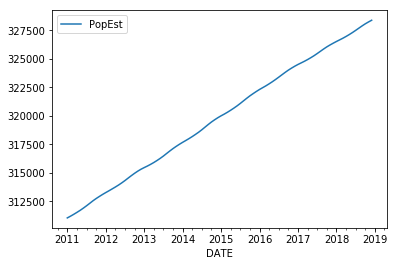

In [6]:
df.plot()

In [7]:
len(df)

96

In [8]:
train = df.iloc[:84]
test = df.iloc[84:]

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
model = AR(train['PopEst'])

In [11]:
AR1fit = model.fit(maxlag=1)

In [12]:
AR1fit.aic

6.410771237032258

In [13]:
AR1fit.k_ar

1

In [14]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [15]:
start = len(train)

In [16]:
end = len(train) + len(test) - 1

In [17]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [18]:
predictions = AR1fit.predict(start=start, end=end)

In [19]:
predictions = predictions.rename('AR(1) Predictions')

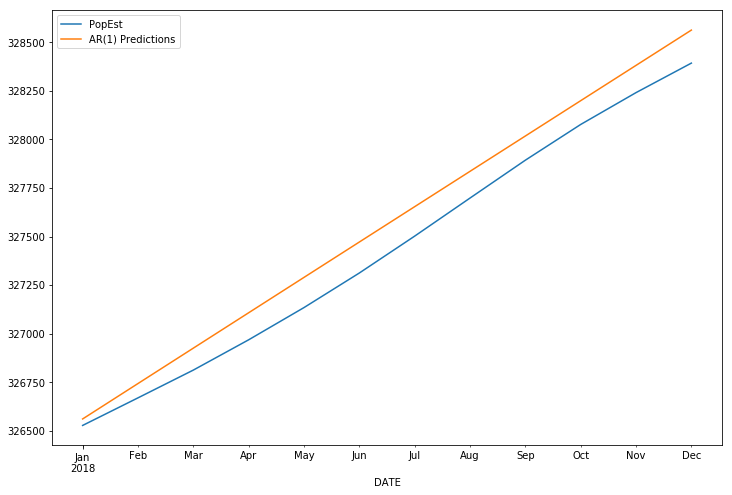

In [20]:
test.plot(figsize=(12,8), legend=True);
predictions.plot(legend=True);

In [21]:
AR2fit = model.fit(maxlag=2)

In [22]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [23]:
predictions2 = AR2fit.predict(start=start, end=end)
predictions2 = predictions2.rename('AR(2) Predictions')

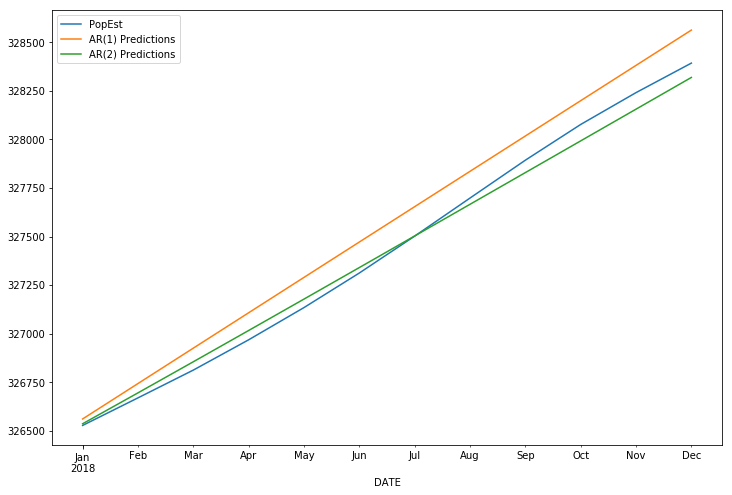

In [24]:
test.plot(figsize=(12,8), legend=True);
predictions.plot(legend=True);
predictions2.plot(legend=True);

In [25]:
ARfit = model.fit(ic='t-stat')

In [26]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
labels = ['AR1','AR2','AR8']

In [29]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) Predictions')

preds = [predictions, predictions2, predictions8]

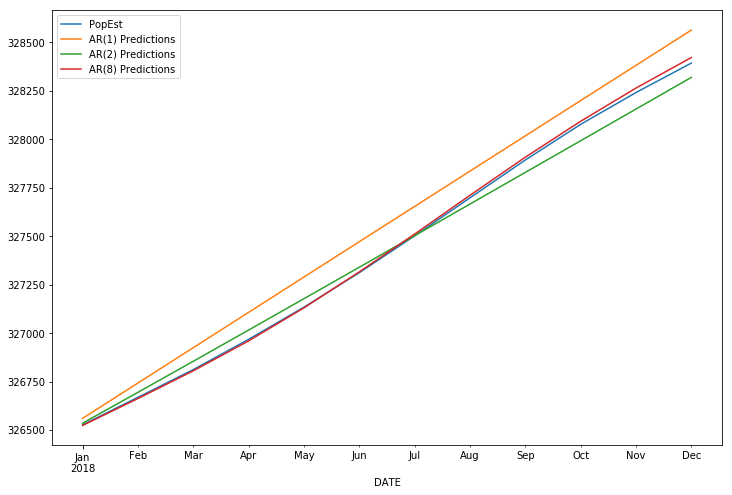

In [30]:
test.plot(figsize=(12,8), legend=True);
predictions.plot(legend=True);
predictions2.plot(legend=True);
predictions8.plot(legend=True);

In [31]:
for i in range(3):
    #np.sqrt()
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.714239577344
AR2 MSE was: 2713.258615675103
AR8 MSE was: 186.97377437908688


In [32]:
# FORECASTING

model = AR(df['PopEst'])

ARfit = model.fit()

forecast_values = ARfit.predict(start=len(df), end=len(df) + 12).rename('Forecast')

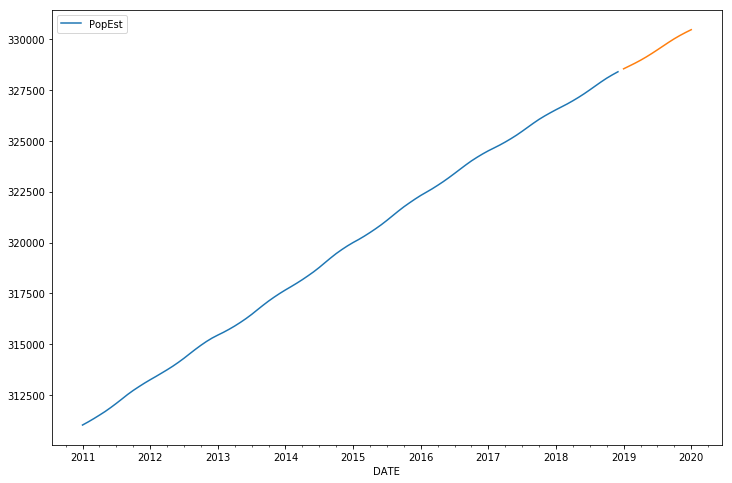

In [33]:
df['PopEst'].plot(figsize=(12,8), legend=True)
forecast_values.plot()